#
# Taller 1 - Exploratory Data Analysis 
## Encuesta telefónica de la CDC sobre salud general enfocado a la diabetes, datos al año 2015
#
## Alumno : Nicolás Torres Hormazábal
#
### Sobre la diabetes:
#
Es una enfermedad crónica que afecta la manera en la que el cuerpo procesa los alimentos.
#
Cuando el cuerpo procesa un alimento, los hidratos de carbono y azúcares presentes en ellos hacen que se transformen en glucosa, una molécula que nos sirve de energía. En contraste a ello, el páncreas produce insulina, a manera de contrarrestar la cantidad de glucosa presente en la sangre. Un desbalance en el proceso anterior se conoce como prediabetes, y en casos más avanzados se le conoce como diabetes.
#
La diabetes trae consigo distintos males a la salud, como complicaciones cardíacas, pérdida de visión y problemas a los riñones, recurriendo incluso a la diálisis. Así como otras complicaciones.
# 
Afortunadamente, si bien es crónica una enfermedad crónica, viviendo un estilo de vida saludable y consultando regularmente a especialistas se puede llevar una calidad de vida bastante regular si la comparamos con aquellos individuos que no la padezcan.
#
### Sobre el dataset:
#
Los datos vienen de la Behavioral Risk Factor Surveillance System (BRFSS), una encuesta por teléfono realizada por la Centers for Disease Control and Prevention (CDC), organización federal. El objetivo de la encuesta, realizada en todos los estados de Estados Unidos, es obtener información general acerca de la población, referidos a su estado de salud mental, físico, peso, alimentación, rutinas, entre otros.
#
##### *IMPORTANTE : Exceputando la variable Sex, donde 0 es Female (mujer) y 1 es Male (hombre), para efectos prácticos, 0 siempre será no y 1 siempre será sí.*
Ejemplo:
#
La variable "HighBP": si es 0, significa que el paciente no tiene la presión arterial alta. Y si es 1, significa que sí tiene la presión arterial alta.

*Fuentes:*
#
https://www.cdc.gov/diabetes/spanish/basics/diabetes.html
#
https://www.cdc.gov/brfss/index.html



In [1]:
#Bloque de importaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA


In [2]:
#Bloque de definiciones
def check_normality_shapiro(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Rechazamos hipótesis nula >> Los datos no siguen una distribución normal")
    else:      
        print("Aceptamos la hipotesis alternativa >> Los datos siguen una distribución normal") 

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rechazamos la hipotesis nula >> Las varianzas de las muestras son diferentes")
    else:
        print("Aceptamos la hipotesis alternativa >> Los datos tienen igual varianza.")

In [3]:
#Definición de DF y datos varios sobre el dataset
#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
df = pd.read_csv(r'C:\Users\nicot\Mi unidad\Notebooks\Colab Notebooks\TIC I\Diabetes datasets\diabetes_binary_health_indicators_BRFSS2015.csv')
#también mostraremos todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Información general
print('Info')
df.info()
#22 columnas, sin valores nulos y todos como float

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64


In [5]:
#Información acerca de los valores nulos
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#Buscar duplicados
df.duplicated().sum()

24206

In [7]:
#Eliminar duplicados
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

0


In [8]:
#Mostramos la estructura del DF
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
#Describe
#resulta poco práctico teniendo tantas variables binarias, pero de todas maneras nos habla de la estructura del BMI, por ejemplo.
#también los días buenos y malos fisicamente y mentalemente en un mes
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587,0.060791,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004,0.238947,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


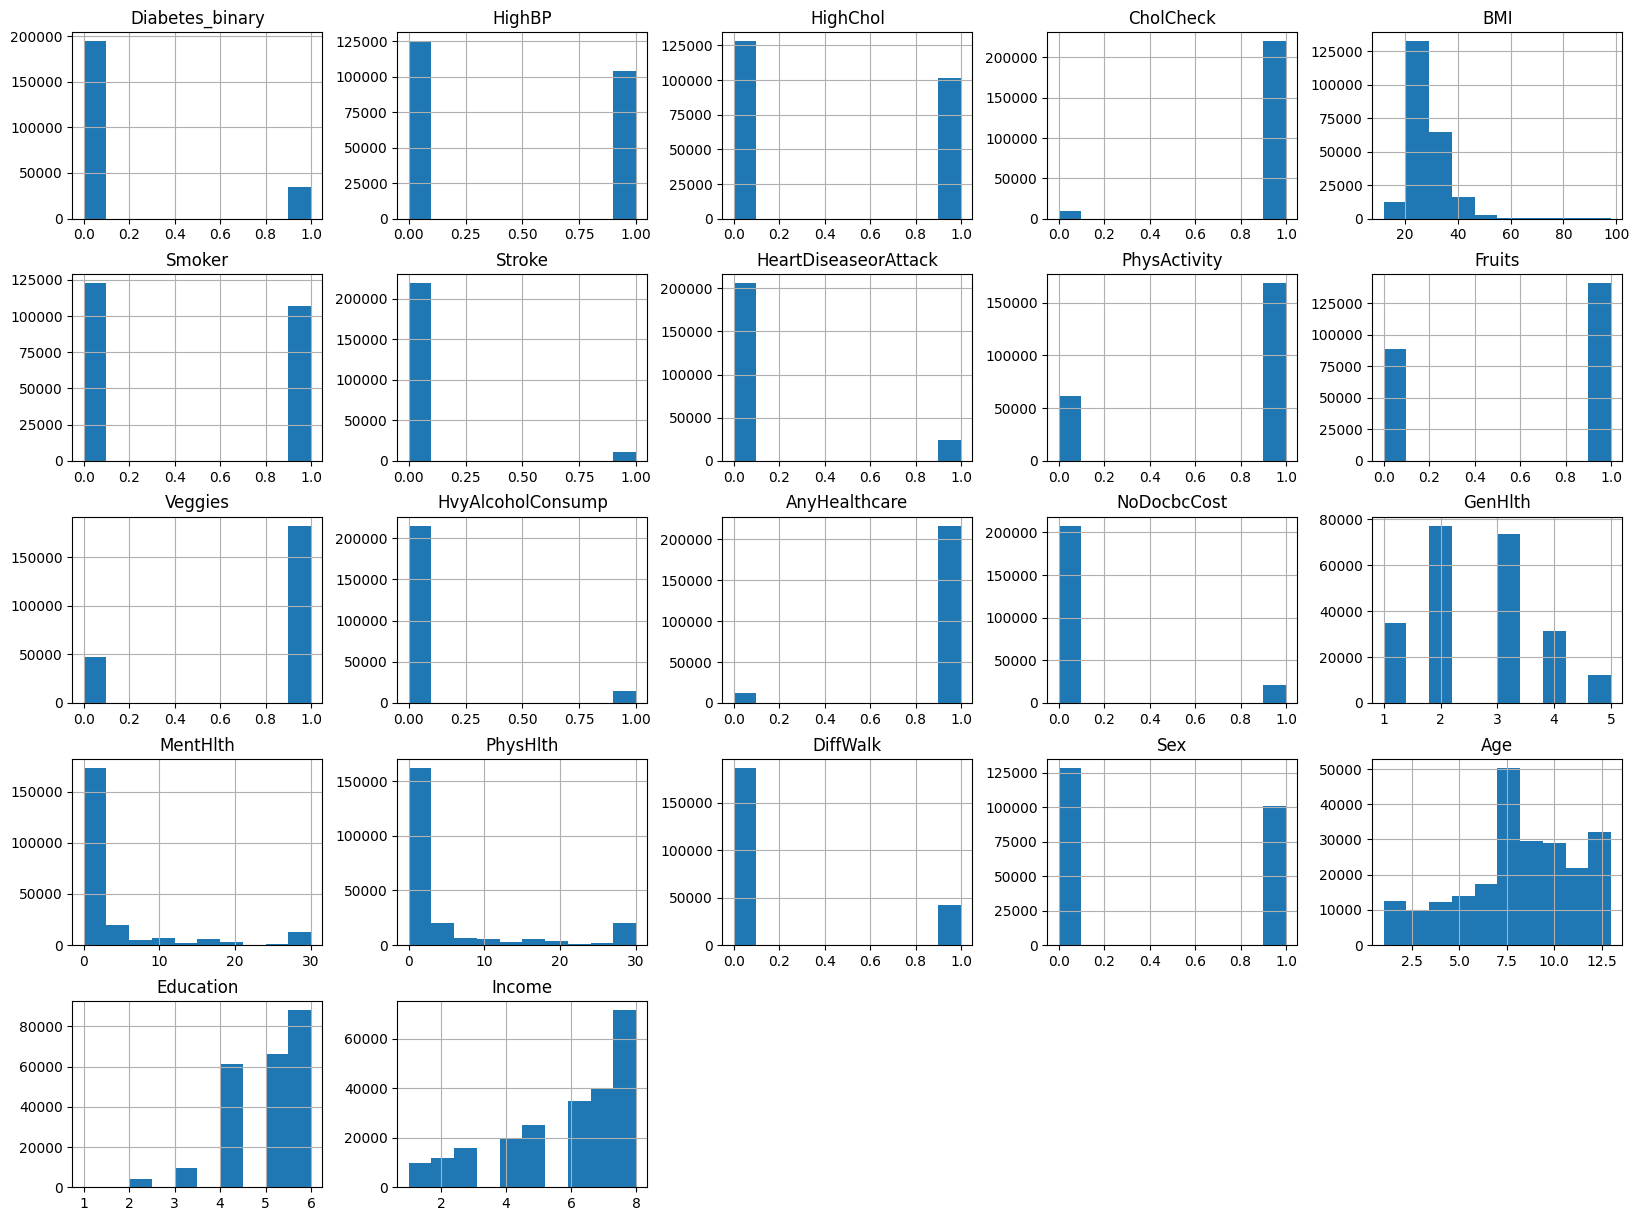

In [10]:
#Graficos acerca de la información general del DF
df.hist(figsize = (20,15))
plt.show()

In [11]:
# arreglar lo del primero
# resumir un poquito
# de correlación en adelante
# revisar la tabla de correlaciones, de ahí en adelante se hace lo de los clusters y todas esas cosasp
# hacer reducción de componentes
# el mejor clusterizador para el problema es, con el reductor de dimensionalidad, etc


Con esto, tenemos una imagen general de como se comportan nuestros datos sin necesidad de saber exactamente a que se refieren los mismos

Tenemos:
 #
Variables discretas y continuas
#
Pocas distribuciones normales (a simple vista) y, 
#
Muchas variables binarias.

#
Separación de diabéticos y no diabéticos

In [12]:
#Vamos a hacer dos df distintos, uno que contenga a personas con diabetes y uno que tenga a personas sin diabetes
#lo usaremos más adelante
df_diabetes = df.query('Diabetes_binary == 1')
df_no_diabetes = df.query('Diabetes_binary == 0')

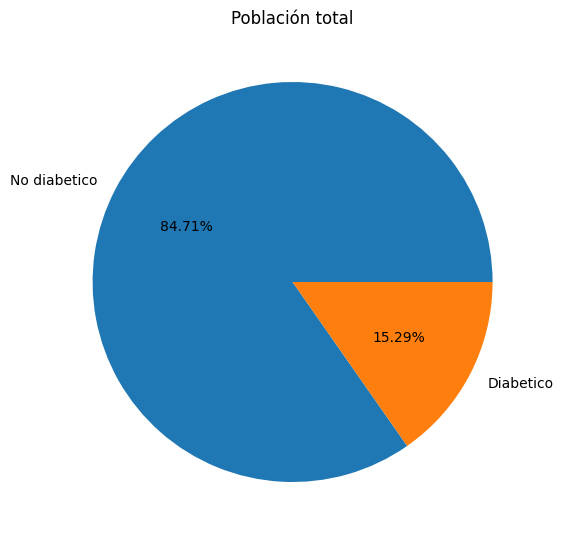

In [13]:
#Porcentaje de personas con y sin diabetes
diabetes = df['Diabetes_binary'].value_counts()
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
etiquetas = ["No diabetico", "Diabetico"]
plt.pie(diabetes.values, labels = etiquetas, autopct='%1.2f%%')
plt.title('Población total')
plt.show()

#
Diabetes por genero

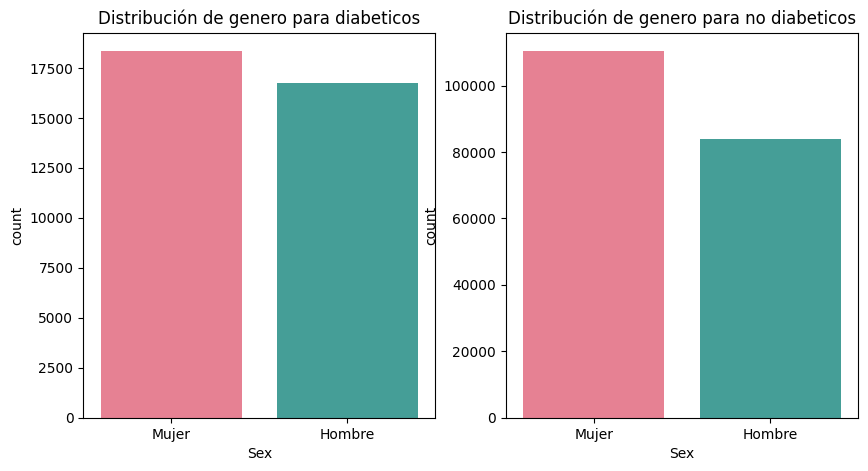

In [14]:
#diabetes por genero
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))

ax1 = sns.countplot(data = df_diabetes, x='Sex', ax=ax1, palette = 'husl')
ax1.set(title='Distribución de genero para diabeticos')
ax1.set_xticklabels(['Mujer', 'Hombre'])

ax2 = sns.countplot(data = df_no_diabetes, x = 'Sex', ax=ax2, palette = 'husl' )
ax2.set(title='Distribución de genero para no diabeticos')
ax2.set_xticklabels(['Mujer', 'Hombre'])
plt.show()

#
Distribución de edad 

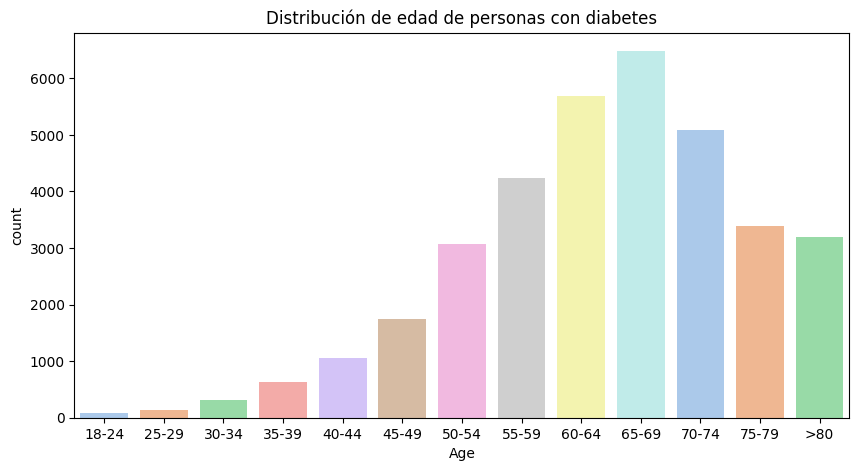

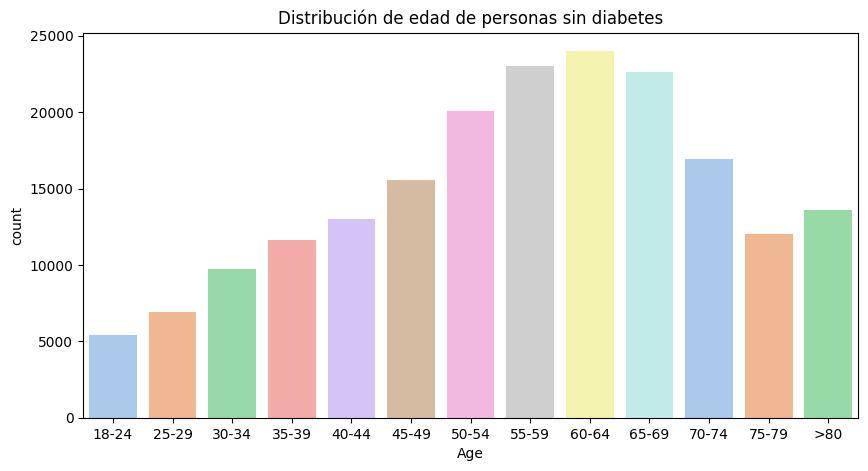

In [15]:
# Distribucion de edad
etiquetas = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']
fig1 = plt.figure(figsize=(10,5))

ax1 = sns.countplot(data=df_diabetes, x='Age', palette = 'pastel')
ax1.set(title= 'Distribución de edad de personas con diabetes')
ax1.set_xticklabels(labels=etiquetas,
                    rotation = 0)

fig2 = plt.figure(figsize=(10,5))
ax2 = sns.countplot(data=df_no_diabetes, x='Age', palette = 'pastel')
ax2.set(title= 'Distribución de edad de personas sin diabetes')

ax2.set_xticklabels(labels=etiquetas,
                    rotation = 0)
plt.show()

#
Distribución de BMI por género, población general.

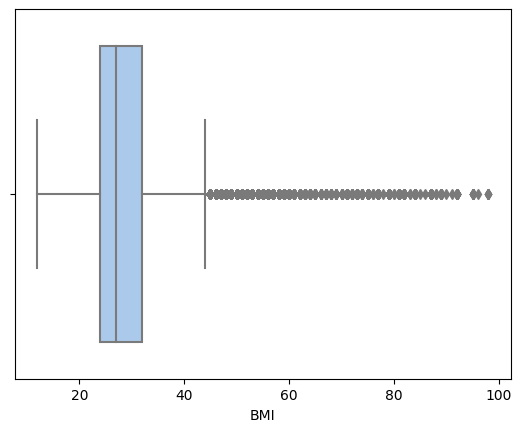

In [16]:
#Vemos un box-plot del bmi de la población general, con el fin de eliminar los valores atípicos y poder graficar mejor después
#showfliers en false nos elimina los valores atípicos

sns.boxplot(x='BMI',data=df, palette = "pastel", showfliers = True)
plt.show()

In [17]:
#Ahora, separamos entre sexos para hacer la comparación que queremos
#Hombres
hombres = df.query('Sex == 0')
hombres_bmi = hombres['BMI']

#Mujeres
mujeres = df.query('Sex == 1')
mujeres_bmi = mujeres['BMI']

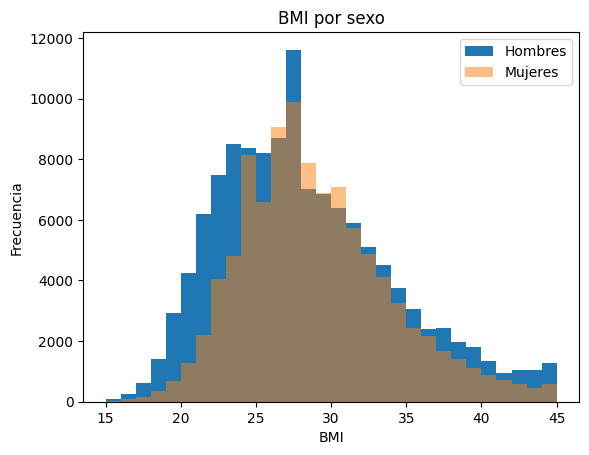

In [18]:
#Vamos a mostrar desde BMI 15 hasta BMI 55, el resto son valores alterados
intervalos = range(15,46,1)

plt.hist(hombres_bmi, bins=intervalos, alpha=1, label='Data 1')
plt.hist(mujeres_bmi, bins=intervalos, alpha=0.5, label='Data 2')

plt.legend(['Hombres', 'Mujeres'])
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('BMI por sexo')

plt.show()

Hasta aqui la información inicial del DF

#
#### Hipótesis 1)
#
BMI de mujeres y distribución normal

En base al gráfico anterior, resulta interesante analizar el gráfico de BMI de las mujeres, con lo que nos podemos plantear la siguiente pregunta:
#
¿Se distribuye normalmente?
#
Con ello, planteamos las hipótesis:

- $H_{0}$: El BMI de las mujeres sigue una distribución normal
- $H_{1}$: El BMI de las mujeres no sigue una distribución normal

In [19]:
check_normality_shapiro(mujeres_bmi)

p value:0.0000
Rechazamos hipótesis nula >> Los datos no siguen una distribución normal


c:\Users\nicot\miniconda3\envs\myenv\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(mujeres_bmi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.865, p=0.000
Probably not Gaussian


In [21]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(mujeres_bmi)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=53052.492, p=0.000
Probably not Gaussian


Entonces, rechazamos nuestra hipótesis nula. El BMI de las mujeres no se distribuye de manera normal.

#
#### Hipótesis 2)
#
Diabetes y salud mental


Ahora, con respecto a la salud mental de diabeticos, explorar esta variable (MentHlth)
#
Según el codebook, la variable MentHlth se refiere a 
#
'Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?'

In [22]:
salud_mental_no_diabetes = df_no_diabetes['MentHlth']
salud_mental_diabetes = df_diabetes['MentHlth']

In [23]:
#Testeamos las medias
print('Para personas sin diabetes : ' , salud_mental_no_diabetes.mean().round(2))
print('Para personas con diabetes : ' , salud_mental_diabetes.mean().round(2))

Para personas sin diabetes :  3.33
Para personas con diabetes :  4.49


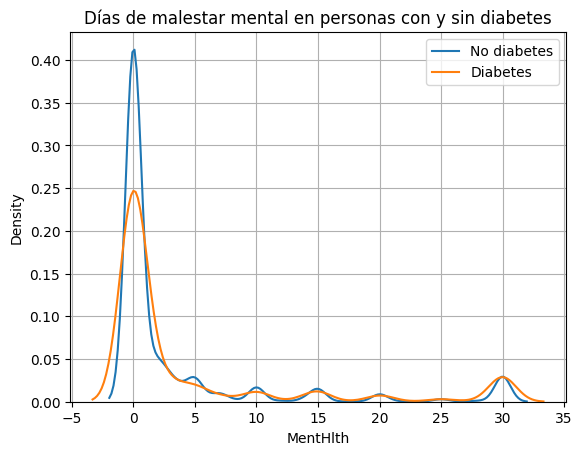

In [24]:
#hagamos una distribución de estos datos
leyenda = ['No diabetes','Diabetes']
sns.kdeplot(salud_mental_no_diabetes)
sns.kdeplot(salud_mental_diabetes)
plt.title('Días de malestar mental en personas con y sin diabetes')
plt.legend(leyenda)
plt.grid()

Con este gráfico, nos surgió una duda respecto al promedio de días malos mentalmente de ambos grupos, expresada en la siguiente pregunta:
#
¿Tienen las personas con y sin diabetes la misma cantidad de días malos de salud mental?
#
Planteamos las siguientes hipótesis:
- $H_{0}$: El promedio de días de malestar mental en personas con y sin diabetes es igual.
- $H_{1}$: El promedio de días de malestar mental en personas con y sin diabetes es distinto.

In [25]:
# T de student
from scipy.stats import ttest_ind

stat, p = ttest_ind(salud_mental_diabetes, salud_mental_no_diabetes)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=25.979, p=0.000
Probably different distributions


Rechazamos la hipótesis nula, las muestras tienen medias distintas.

#
#### Hipótesis 3)
#
Diabetes y healthcare



Frente a la variable AnyHealthcare, que es una variable binaria donde 0 significa que no se tiene contratada healthcare (o previsión de salud), y 1 sí se posee, podemos teorizar que el tener diabetes incide en una mayor contratación de este servicio or parte de los afectados.
#
En suma, me surge la siguiente pregunta
#
¿Es la diabetes un factor significativo a la hora de contratar un sistema de previsión de salud o healthcare?

Para ello, planteamos las siguientes hipótesis:

- $H_{0}$: No existe dependencia entre la contratación de previsión de salud y padecer diabetes
- $H_{1}$: Existe dependencia significativa entre la contratación de previsión de salud y padecer diabetes

In [26]:
#Hacemos tabla de contingencia entre diabetes y healthcare
contigency_1= pd.crosstab(df.Diabetes_binary, df.AnyHealthcare)
contigency_1

AnyHealthcare,0.0,1.0
Diabetes_binary,,
0.0,10967,183410
1.0,1422,33675


Notemos que tenemos valores sobre 25, con lo que una prueba de chi-cuadrado es pertinente

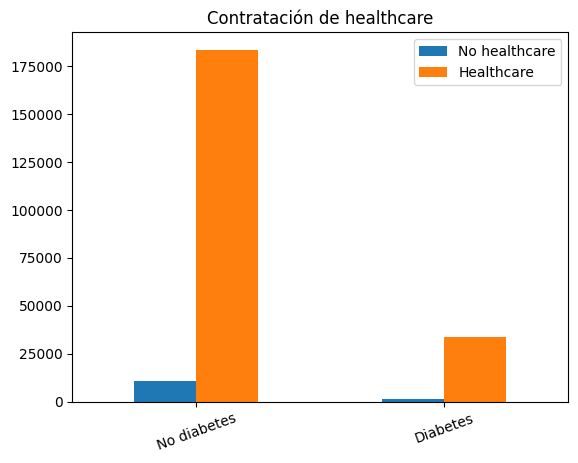

In [27]:
#visualizamos la contratación de healthcare
ax = contigency_1.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No diabetes', 'Diabetes'], rotation=20)
ax.legend(['No healthcare', 'Healthcare'])
plt.title('Contratación de healthcare')
plt.show()

In [28]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=146.937, p=0.000
Probably dependent



Rechazamos hipótesis nula
#
Existe diferencia significativa en la contratación de Healthcare entre personas con y sin diabetes, son variables dependientes.

#
#### Hipotesis 4)
#
Sexo y alta presión arterial en diabeticos


Se puede teorizar que el sexo de las personas con diabetes influye en la aparición de alta presión arterial.
#
Para ello, haremos una prueba de chi-cuadrado con su respectiva tabla de contingencia.

- $H_{0}$: Existe independencia entre el sexo y alta presión arterial en personas con diabetes.
- $H_{1}$: Existe dependencia entre el sexo y la alta presion arterial en personas con diabetes.

In [29]:
#prueba de chi-cuadrado
#tabla de contingencia
contigency_2= pd.crosstab(df_diabetes.Sex, df_diabetes.HighBP)
contigency_2


HighBP,0.0,1.0
Sex,,
0.0,4494,13851
1.0,4198,12554


In [30]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
	
#     - H0: las dos muestras son independientes.
# - H1: existe una dependencia entre las muestras.

stat=1.457, p=0.227
Probably independent


Aceptamos la hipótesis nula, el sexo y la presión arterial son variables independientes, es decir, no afecta el sexo en la aparición de alta presión arterial en personas con diabetes.

#
#### Mapa de calor de correlaciones

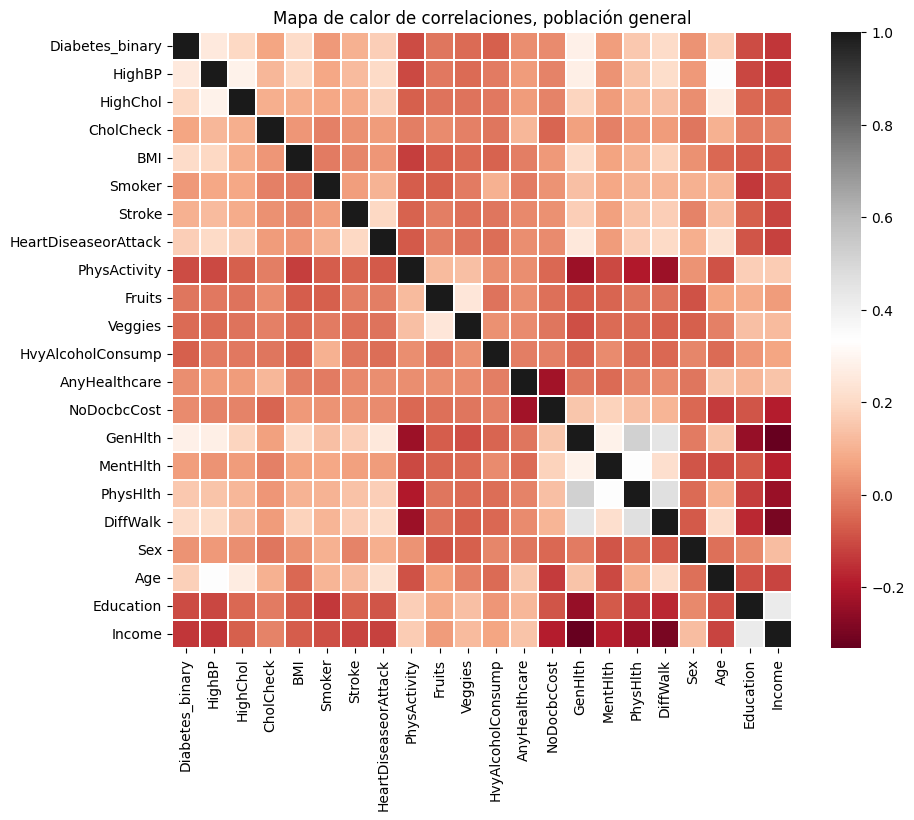

In [31]:
#Aquí hicimos un bonito mapa de calor de correlaciones
df_corr = df.dropna().corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, cmap="RdGy", 
            annot=False, 
            linewidths=0.2, linecolor='white', 
            cbar=True, cbar_kws={'orientation': 'vertical'}, 
            annot_kws={"size": 12})
plt.title('Mapa de calor de correlaciones, población general')
plt.show()

Resulta interesante hacer lo mismo pero con las personas con y sin diabetes

C:\Users\nicot\AppData\Local\Temp\ipykernel_3196\1235092421.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


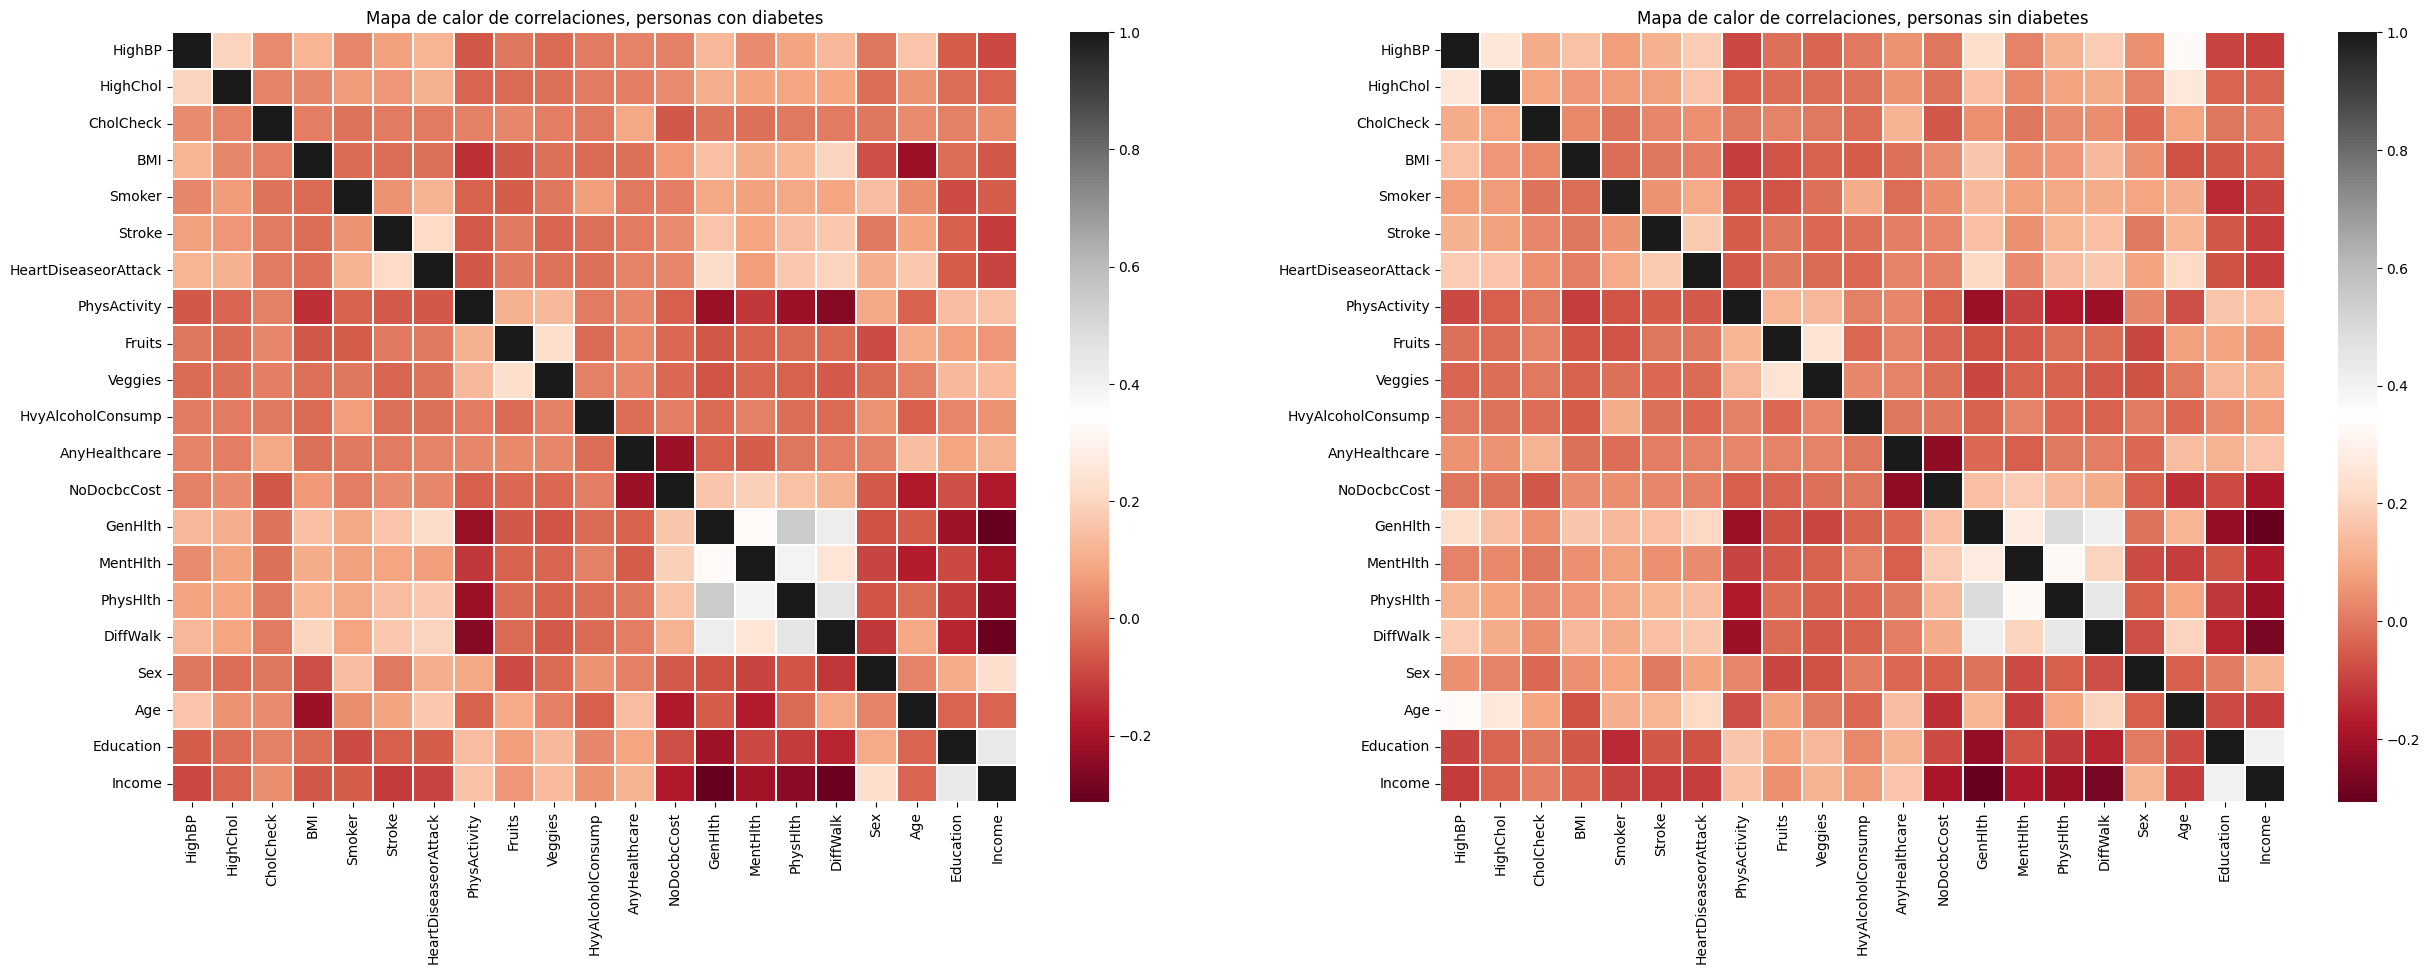

In [32]:
#Mapa de correlaciones para personas con y sin diabetes
#Preparamos la data de las personas con diabetes
df_corr_diabetes = df_diabetes.dropna().corr()
df_corr_diabetes = df_corr_diabetes.drop(axis = 1, labels = ['Diabetes_binary'])
df_corr_diabetes = df_corr_diabetes.drop(axis = 0, labels = ['Diabetes_binary'])
#ahora la data para personas sin diabetes
df_corr_no_diabetes = df_no_diabetes.dropna().corr()
df_corr_no_diabetes = df_corr_no_diabetes.drop(axis = 1, labels = ['Diabetes_binary'])
df_corr_no_diabetes = df_corr_no_diabetes.drop(axis = 0, labels = ['Diabetes_binary'])
#Código necesario para crear los dos mapas de correlaciones juntos
#Todo lo hace la función subplots

plt.subplots(figsize=(30,10))

plt.subplot(1, 2, 1)
sns.heatmap(df_corr_diabetes, cmap="RdGy", 
            annot=False, 
            linewidths=0.2, linecolor='white', 
            cbar=True, cbar_kws={'orientation': 'vertical'}, 
            annot_kws={"size": 9})
plt.title('Mapa de calor de correlaciones, personas con diabetes')

plt.subplot(1, 2, 2)
sns.heatmap(df_corr_no_diabetes, cmap="RdGy", 
            annot=False, 
            linewidths=0.2, linecolor='white', 
            cbar=True, cbar_kws={'orientation': 'vertical'}, 
            annot_kws={"size": 9})
plt.title('Mapa de calor de correlaciones, personas sin diabetes')
plt.show()

Como se observa, el mapa de calor cambia, me parece interesante ver más información acerca de porque esto ocurre, ya sabemos que la aparición de diabetes en la muestra estudiada influye, pero qué tanto lo hace?

#
#### Hipotesis 5)
#
BMI y salud general en personas con diabetes

- $H_{0}$: El BMI y la salud general de las personas con diabetes son variables dependientes.
- $H_{1}$: El BMI y la salud general de las personas con diabetes son variables independientes.

In [33]:
#Esta relacionada la salud general con el BMI, en personas diabeticas?
from scipy.stats import pearsonr
corr1 = df_corr_diabetes['GenHlth']
corr2 = df_corr_diabetes['BMI']
stat, p = pearsonr(corr1, corr2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.333, p=0.140
Probably independent


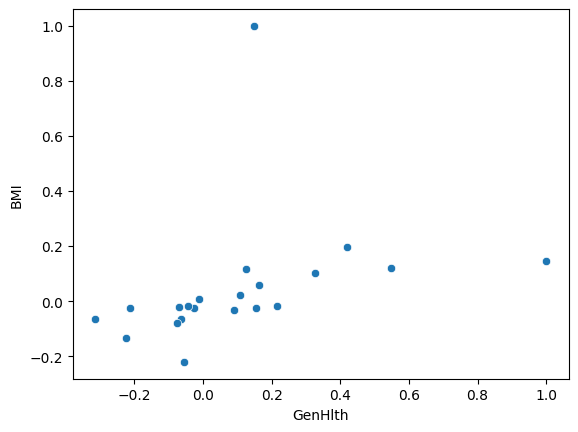

In [34]:
#Graficamos la relación anteriormente testeada
sns.scatterplot(data=df_corr_diabetes, x='GenHlth', y='BMI')
plt.show()



Rechazamos la hipótesis nula, las variables estudiadas son independientes entre sí.
#
No hay relación de dependencia entre el BMI y la salud general de las personas con diabetes
#
No se puede argumentar que el BMI de una persona con diabetes influya en su bienestar general.

#
#### Hipotesis 6)
#
Actividad fisica con la salud general en personas con diabetes (correlacion)

- $H_{0}$: Existe una relación de dependencia entre la actividad física y el estado de salud de las personas con diabetes
- $H_{1}$: No existe dependencia entre estas variables.

stat=-0.614, p=0.003
Probably dependent


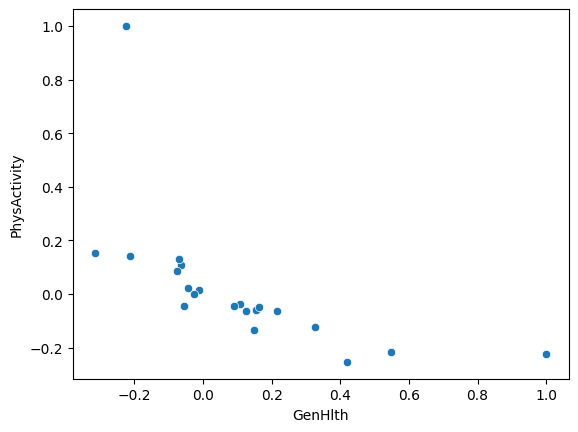

In [35]:
#Esta relacionada la actividad fisica con la salud general en personas con y sin diabetes?

from scipy.stats import pearsonr
corr1 = df_corr_diabetes['GenHlth']
corr2 = df_corr_diabetes['PhysActivity']
stat, p = pearsonr(corr1, corr2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
	

sns.scatterplot(data=df_corr_diabetes, x='GenHlth', y='PhysActivity')
plt.show()

Aceptamos la hipótesis nula
#
Existe evidencia para sugerir que la salud general y el BMI tienen relación en personas con diabetes
#
Son variables dependientes entre si

#
#### Hipotesis 7)
#
Resulta interesante también analizar, en personas diabéticas, si su edad tiene algo que ver con la salud general

- $H_{0}$: Existe una relación de dependencia entre la edad y el estado de salud de las personas con diabetes.
- $H_{1}$: Son variables independientes.

In [36]:
#Esta relacionada la edad con la salud general de las personas diabéticas?
from scipy.stats import pearsonr
corr1 = df_corr_diabetes['GenHlth']
corr2 = df_corr_diabetes['Age']
stat, p = pearsonr(corr1, corr2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.159, p=0.492
Probably independent


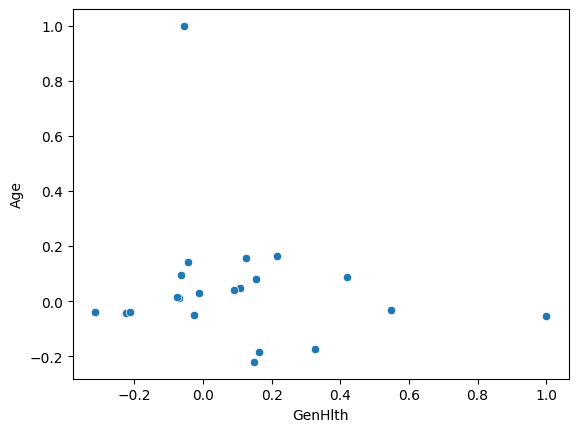

In [37]:
sns.scatterplot(data=df_corr_diabetes, x='GenHlth', y='Age')
plt.show()

Como se observa, la edad y la salud general de las personas con diabetes no son variables dependientes.
#
Rechazamos la hipótesis nula, son variables independientes.

#
### Comentarios finales
#
A modo de cierre, me pareció interesante el hecho de que, a pesar de ser un estudio enfocado a la diabetes, la mayoría de la muestra corresponde a personas sin la enfermedad. En eso baso mis sospechas, creo que este dataset está especialmente diseñado para predecir factores que inciden en la aparción de diabetes, así como también a factores que hacen que esta mejore o empeore, más que intentar comprender la enfermedad.
#
Un estudio más extenso y con herramientas que veremos luego en el curso podría ser capaz de identificar muchas variables distintas para predecir la aparición de la enfermedad, así como identificar cuáles variables inciden más o menos en el desarrollo de la enfermedad. 
#
Como lo puede ser la clase social, educación e ingresos, me interesaría descubrir si estos factores tienen algo que ver.

